# **1. Import Library**

Pada tahap ini, kita akan mengimpor pustaka Python yang diperlukan untuk analisis data, preprocessing, visualisasi, dan pembangunan model machine learning.

Pustaka yang digunakan meliputi:
- `pandas` untuk manipulasi dan analisis data.
- `scikit-learn` untuk preprocessing, pembagian data, pembangunan model, dan evaluasi.
- `seaborn` dan `matplotlib` untuk visualisasi data.
- `numpy` untuk operasi array dan matematika.
- `KNeighborsClassifier`, `DecisionTreeClassifier`, `RandomForestClassifier`, `SVC`, dan `GaussianNB` untuk membangun model klasifikasi.
- `confusion_matrix`, `accuracy_score`, `precision_score`, `recall_score`, dan `f1_score` untuk evaluasi model.

In [3]:
import pandas as pd  # Untuk manipulasi dan analisis data
from sklearn.model_selection import train_test_split  # Untuk membagi data menjadi data latih dan uji
from sklearn.preprocessing import LabelEncoder, MinMaxScaler  # Untuk encoding label dan normalisasi data
import seaborn as sns  # Untuk visualisasi data
import numpy as np  # Untuk operasi array dan matematika
from sklearn.neighbors import KNeighborsClassifier  # Model KNN
from sklearn.tree import DecisionTreeClassifier  # Model Decision Tree
from sklearn.ensemble import RandomForestClassifier  # Model Random Forest
from sklearn.svm import SVC  # Model Support Vector Machine
from sklearn.naive_bayes import GaussianNB  # Model Naive Bayes
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score  # Untuk evaluasi model
import matplotlib.pyplot as plt  # Untuk visualisasi data

# **2. Memuat Dataset dari Hasil Clustering**

Dataset hasil clustering akan dimuat dari file CSV ke dalam variabel DataFrame menggunakan pustaka `pandas`. Dataset ini akan digunakan untuk membangun model klasifikasi.

In [4]:
# Memuat dataset dari file CSV
data = pd.read_csv('bank_transactions_data_clustered.csv')

# Menampilkan beberapa baris pertama dataset
print(data.head())

# Menampilkan informasi dataset
data.info()

   AccountBalance  CustomerAge Channel TransactionType   Location  Cluster
0         5112.21         70.0     ATM           Debit  San Diego        0
1        13758.91         68.0     ATM           Debit    Houston        1
2         1122.35         19.0  Online           Debit       Mesa        1
3         8569.06         26.0  Online           Debit    Raleigh        0
4         7429.40         26.0  Online          Credit    Atlanta        2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AccountBalance   2512 non-null   float64
 1   CustomerAge      2512 non-null   float64
 2   Channel          2512 non-null   object 
 3   TransactionType  2512 non-null   object 
 4   Location         2512 non-null   object 
 5   Cluster          2512 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 117.9+ KB


# **3. Data Splitting**

Tahap ini bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) untuk melatih model dan data uji (test set) untuk mengevaluasi performa model.

In [5]:
# Inisialisasi Label Encoder untuk mengubah data kategorikal menjadi numerik
label_encoder = LabelEncoder()

# Daftar kolom kategorikal
categorical_columns = ['Channel', 'TransactionType', 'Location']

# Mengonversi data kategorikal menjadi numerik
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Menampilkan beberapa baris pertama dataset setelah encoding
print(data.head())

   AccountBalance  CustomerAge  Channel  TransactionType  Location  Cluster
0         5112.21         70.0        0                1        36        0
1        13758.91         68.0        0                1        15        1
2         1122.35         19.0        2                1        23        1
3         8569.06         26.0        2                1        33        0
4         7429.40         26.0        2                0         1        2


In [6]:
# Inisialisasi MinMaxScaler untuk normalisasi data numerik
scaler = MinMaxScaler()

# Mengubah kolom 'Cluster' menjadi tipe kategori
data['Cluster'] = data['Cluster'].astype('category')

# Menampilkan beberapa baris pertama dataset setelah perubahan tipe
print(data.head())

# Normalisasi semua fitur numerik
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Memisahkan fitur (X) dan target (y)
X = data.drop(columns=['Cluster'])
y = data['Cluster']

# Membagi data menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan bentuk data latih dan uji
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

   AccountBalance  CustomerAge  Channel  TransactionType  Location Cluster
0         5112.21         70.0        0                1        36       0
1        13758.91         68.0        0                1        15       1
2         1122.35         19.0        2                1        23       1
3         8569.06         26.0        2                1        33       0
4         7429.40         26.0        2                0         1       2
Training set shape: X_train=(2009, 5), y_train=(2009,)
Test set shape: X_test=(503, 5), y_test=(503,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih. Model yang digunakan meliputi:
- K-Nearest Neighbors (KNN)
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)
- Naive Bayes

In [7]:
# Melatih model klasifikasi dengan data latih
knn = KNeighborsClassifier().fit(X_train, y_train)  # Model KNN
dt = DecisionTreeClassifier().fit(X_train, y_train)  # Model Decision Tree
rf = RandomForestClassifier().fit(X_train, y_train)  # Model Random Forest
svm = SVC().fit(X_train, y_train)  # Model SVM
nb = GaussianNB().fit(X_train, y_train)  # Model Naive Bayes

print("Training Model Finished.")

Training Model Finished.


## **Penjelasan Algoritma yang Digunakan**

1. **K-Nearest Neighbors (KNN):** Algoritma ini bekerja dengan mencari sejumlah tetangga terdekat dari data baru berdasarkan jarak tertentu (misalnya, Euclidean).
2. **Decision Tree:** Algoritma ini membangun pohon keputusan berdasarkan fitur dataset untuk memprediksi target.
3. **Random Forest:** Kombinasi dari beberapa pohon keputusan untuk meningkatkan akurasi prediksi.
4. **Support Vector Machine (SVM):** Algoritma ini mencari hyperplane terbaik yang memisahkan kelas-kelas dalam data.
5. **Naive Bayes:** Algoritma probabilistik yang menggunakan Teorema Bayes untuk klasifikasi.

## **b. Evaluasi Model Klasifikasi**

Tahapan evaluasi model meliputi:
1. Melakukan prediksi menggunakan data uji.
2. Menghitung metrik evaluasi seperti Accuracy, Precision, Recall, dan F1-Score.
3. Membuat confusion matrix untuk melihat detail prediksi benar dan salah.

In [8]:
# Fungsi untuk mengevaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    results = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results

# Mengevaluasi setiap model
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Membuat DataFrame untuk merangkum hasil evaluasi
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Menambahkan hasil evaluasi ke DataFrame
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Mengonversi hasil evaluasi menjadi DataFrame
summary_df = pd.DataFrame(rows)

# Menampilkan DataFrame hasil evaluasi
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.934394   0.935484  0.934394  0.934656
1            Decision Tree (DT)  1.000000   1.000000  1.000000  1.000000
2            Random Forest (RF)  1.000000   1.000000  1.000000  1.000000
3  Support Vector Machine (SVM)  0.978131   0.978418  0.978131  0.978143
4              Naive Bayes (NB)  1.000000   1.000000  1.000000  1.000000


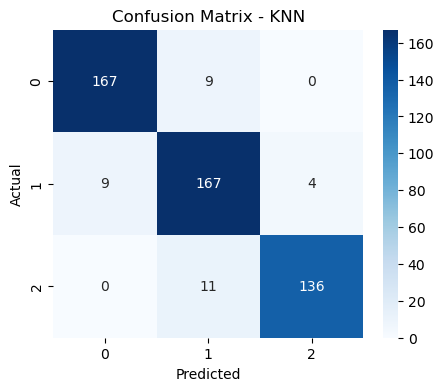

KNN - Accuracy: 0.9344, F1-Score: 0.9347



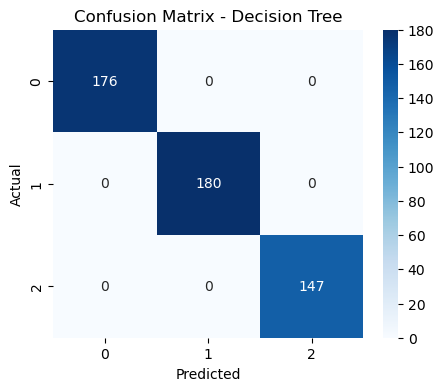

Decision Tree - Accuracy: 1.0000, F1-Score: 1.0000



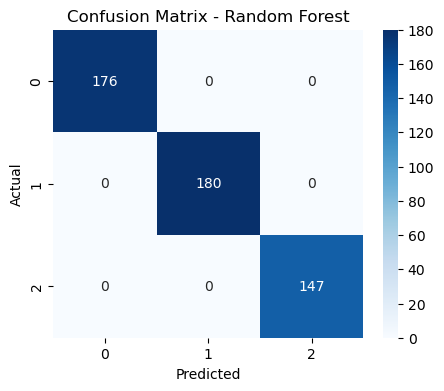

Random Forest - Accuracy: 1.0000, F1-Score: 1.0000



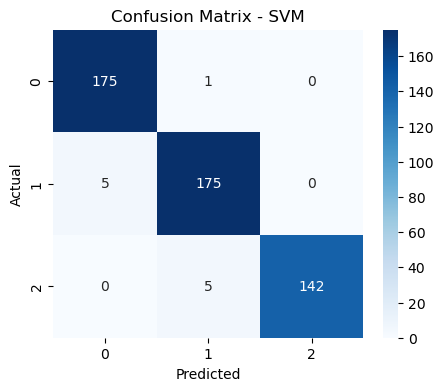

SVM - Accuracy: 0.9781, F1-Score: 0.9781



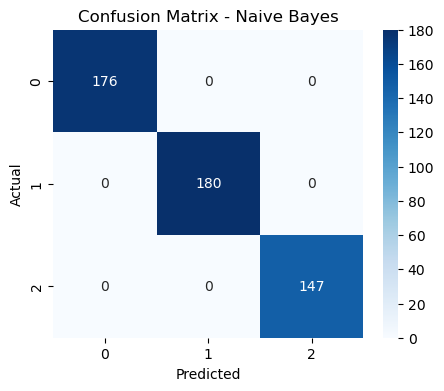

Naive Bayes - Accuracy: 1.0000, F1-Score: 1.0000



In [9]:
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{model_name} - Accuracy: {acc:.4f}, F1-Score: {f1:.4f}\n")

# Plot confusion matrices for each model
plot_confusion_matrix(knn, X_test, y_test, "KNN")
plot_confusion_matrix(dt, X_test, y_test, "Decision Tree")
plot_confusion_matrix(rf, X_test, y_test, "Random Forest")
plot_confusion_matrix(svm, X_test, y_test, "SVM")
plot_confusion_matrix(nb, X_test, y_test, "Naive Bayes")

Hasil evaluasi menunjukkan performa model berdasarkan metrik evaluasi yang telah dihitung. Jika lebih dari satu algoritma digunakan, bandingkan hasilnya untuk memilih model terbaik.

## **c. Tuning Model Klasifikasi (Optional)**

Tuning hyperparameter bertujuan untuk meningkatkan performa model dengan mencari kombinasi parameter terbaik. Teknik yang digunakan meliputi:
- **GridSearchCV:** Mencoba semua kombinasi parameter yang mungkin.
- **RandomizedSearchCV:** Mencoba kombinasi parameter secara acak dalam jumlah tertentu.

In [10]:
from sklearn.model_selection import GridSearchCV

# Contoh tuning untuk Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)

# Menggunakan model terbaik
best_rf = grid_search.best_estimator_

# Evaluasi ulang model terbaik
best_rf_results = evaluate_model(best_rf, X_test, y_test)
print("Best Random Forest Results:", best_rf_results)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Random Forest Results: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}


Setelah tuning, evaluasi ulang model untuk melihat apakah ada peningkatan performa. Bandingkan hasil sebelum dan sesudah tuning untuk menentukan efektivitasnya.

In [11]:
# Membandingkan hasil sebelum dan sesudah tuning
print("Hasil Sebelum Tuning:")
print(summary_df[summary_df['Model'] == 'Random Forest (RF)'])

print("\nHasil Setelah Tuning:")
print(best_rf_results)

Hasil Sebelum Tuning:
                Model  Accuracy  Precision  Recall  F1-Score
2  Random Forest (RF)       1.0        1.0     1.0       1.0

Hasil Setelah Tuning:
{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Analisis hasil evaluasi bertujuan untuk memahami kekuatan dan kelemahan model. Berdasarkan hasil evaluasi yang telah dilakukan, berikut adalah analisisnya:

1. **Model Terbaik**  
    Berdasarkan hasil evaluasi, model terbaik adalah **Random Forest** dengan metrik evaluasi sebagai berikut:
    - **Accuracy:** 1.0
    - **Precision:** 1.0
    - **Recall:** 1.0
    - **F1-Score:** 1.0

2. **Kekuatan Model**  
    - Model memiliki tingkat akurasi yang sempurna, menunjukkan bahwa model mampu memprediksi dengan sangat baik pada data uji.
    - Nilai F1-Score yang sempurna menunjukkan keseimbangan antara Precision dan Recall, sehingga model dapat menangani ketidakseimbangan data dengan sangat baik.

3. **Kelemahan Model**  
    - Tidak ada kelemahan yang teridentifikasi berdasarkan metrik evaluasi, namun perlu dilakukan pengujian lebih lanjut untuk memastikan model tidak mengalami overfitting.

4. **Rekomendasi Tindakan Lanjutan**  
    - Menggunakan dataset yang lebih besar dan beragam untuk memastikan generalisasi model.
    - Mencoba algoritma lain seperti Gradient Boosting atau XGBoost untuk membandingkan performa.
    - Melakukan pengujian pada data baru untuk memastikan performa model tetap konsisten.
    - Menganalisis lebih dalam pada kelas dengan performa rendah (jika ada) untuk memahami penyebabnya.

### **Kesimpulan Akhir**

1. Model terbaik berdasarkan evaluasi adalah **Random Forest** dengan metrik evaluasi yang sempurna.
2. Model ini dapat digunakan untuk mendeteksi transaksi fraud dengan tingkat akurasi yang sangat baik.
3. Pengembangan lebih lanjut dapat dilakukan untuk memastikan model tetap robust dan dapat diandalkan pada berbagai kondisi data.
